# Timeline 

Source: https://spice-spotlight.scot/2021/03/05/timeline-of-coronavirus-covid-19-in-scotland/
* 31 December 2019 - Chinese authorities alert WHO
* 23rd March - people only allowed to go outside to buy food, exercise once a day, or go to work if can't from home
* 24th March - First day of lockdown 
* 29th May - Move to phase 1
* 11th May - people can go outside more than once a day to exercise (household only)
* 19th June - phase 2
* 29th June - Highstreet retail open, safe return Uni announced
* 29th June <-> 13th July - Free bikes for first 30 mins
* 3rd July - 5 mile rule travel distance relaxed 
* 6th July - Outdoor hospitality opens 
* 8 July - can meet with two different households up to 8 people 
* 10 July - move to phase 3 (in doors up to 8 people, overnight allowed) 
* 13 July - dentists, shopping centers allowed to open
* 15 July - pubs, resteraunts, holiday accomadtion allowed to open 
* 16 July - no physical distancing allowed between primary and secondary school 
* 20 July - oxford show paper that vaccine working (confidence in public increases?)
* 11 August - Schools reopen
* 20 August - Scotlant remains in Stage 3
* 27 August - Police granted power to stop household parties 
* 10 Septemeber - limiiting indoor and outdoor gatherings to 6 people 
* 21 September - University of Edinburgh starts
* 22 Sep - national curfew for pubs and restaurants 
* 7 October - hospitality restriced to 6am to 6pm no sale alcohol indoors, premises may open outdoors until 10pm, with sales of alcohol. All licensed premises in the central belt area will be required to close, with the exception of takeaway services. Outdoor live events, adult contact sports and indoor group exercise classes (18+) are to be paused
* 9 November - '90% protection' vaccine announced 
* 17 November - Edinburgh remains level 3
* 8 december - Plans to start vaccinations 
* 30 December - Scottish Government urge the public to stay home during Hogmanay to suppress COVID-19.
* 5 January - Scottish Government announce mainland Scotland is to go into lockdown from 5 January 2021 with a new legal requirement forbidding anyone from leaving their home except for essential purposes. Suspension of all travel corridors
* 16 January - Lockdown restrictions strengthened
* 5 Feburary - mandatory hotel quarantine announced for 15 Feb when traveling from banned countries 
* 2 march - announcement for primary school children to return to school

# Key things to look for
* We can assume dates before 2020 are valid as a comparison for pre-COVID days. 
* Is there a sudden drop in activity at the initial lockdown?
* What about transition phase; did people begin to get cautious with all the talk before official lockdown?
* Is there a clear point where public confidence grows and they stop caring about the restrictions?
* We'd expect biking activity to increase mid July due to a lot of lifted restrictions, does data reflect this? 
* What is night time activity on bikes like before and after the early closing of restaurants and pubs?
* Does bike activity increase when people are allowed to go and exercise?
* People are forbidden to leave hom from 5th January -- does data reflect this? 

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
mpl.rcParams['font.size'] = 9 

In [2]:
if False:
    # download the datasets
    URL = 'https://data.urbansharing.com/edinburghcyclehire.com/trips/v1/{}/{:02d}.json'
    months_2019 = [pd.read_json(URL.format('2019', month)) for month in range(1, 13)]
    months_2020 = [pd.read_json(URL.format('2020', month)) for month in range(1, 13)]
    months_2021 = [pd.read_json(URL.format('2021', month)) for month in range(1, 4)] # up to March
    pd.concat(months_2019, ignore_index=True).to_pickle('datasets/trips_2019.pkl')
    pd.concat(months_2020, ignore_index=True).to_pickle('datasets/trips_2020.pkl')
    pd.concat(months_2021, ignore_index=True).to_pickle('datasets/trips_2021.pkl')
    
trips_2019 = pd.read_pickle('datasets/trips_2019.pkl')
trips_2020 = pd.read_pickle('datasets/trips_2020.pkl')
trips_2021 = pd.read_pickle('datasets/trips_2021.pkl')
all_trips = pd.concat([trips_2019, trips_2020, trips_2021], ignore_index=True)

In [3]:
trips_2021

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2021-01-01 00:48:42.884000+00:00,2021-01-01 00:52:04.432000+00:00,201,1024,Meadow Place,End of Meadow Place,55.940238,-3.194640,265,Meadows East,Between Melville Terrace and Sciennes,55.939809,-3.182739
1,2021-01-01 00:52:12.457000+00:00,2021-01-01 01:00:37.449000+00:00,504,265,Meadows East,Between Melville Terrace and Sciennes,55.939809,-3.182739,1818,Dynamic Earth,"Outside Dynamic Earth, Holyrood Road",55.951089,-3.175725
2,2021-01-01 00:55:14.884000+00:00,2021-01-01 01:12:52.893000+00:00,1058,183,Waverley Bridge,near the top of the South ramp,55.951981,-3.191890,1092,Dalry Road Lidl,None,55.941791,-3.222415
3,2021-01-01 00:55:15.217000+00:00,2021-01-01 01:13:15.643000+00:00,1080,183,Waverley Bridge,near the top of the South ramp,55.951981,-3.191890,1092,Dalry Road Lidl,None,55.941791,-3.222415
4,2021-01-01 00:55:22.724000+00:00,2021-01-01 01:00:20.668000+00:00,297,1096,West Crosscauseway,On island next to Buccleuch Street,55.943836,-3.184951,1727,Causewayside,Outside National Library of Scotland,55.936506,-3.180166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14787,2021-03-13 22:50:42.035000+00:00,2021-03-13 22:59:20.160000+00:00,518,1052,Surgeons Hall,East side of Nicolson Street,55.946643,-3.185475,264,Pollock Halls,Pollock Halls Entrance,55.940081,-3.171747
14788,2021-03-13 23:05:44.953000+00:00,2021-03-13 23:38:36.451000+00:00,1971,2263,Musselburgh Lidl,Musselborough North High Street opposite Harbo...,55.943880,-3.066754,2263,Musselburgh Lidl,Musselborough North High Street opposite Harbo...,55.943880,-3.066754
14789,2021-03-13 23:05:49.011000+00:00,2021-03-13 23:37:57.584000+00:00,1928,2263,Musselburgh Lidl,Musselborough North High Street opposite Harbo...,55.943880,-3.066754,2263,Musselburgh Lidl,Musselborough North High Street opposite Harbo...,55.943880,-3.066754
14790,2021-03-13 23:06:52.776000+00:00,2021-03-13 23:38:12.447000+00:00,1879,2263,Musselburgh Lidl,Musselborough North High Street opposite Harbo...,55.943880,-3.066754,2263,Musselburgh Lidl,Musselborough North High Street opposite Harbo...,55.943880,-3.066754


In [4]:
# check for any missing values
print(trips_2019.isnull().values.any())
print(trips_2020.isnull().values.any())
print(len(trips_2020[trips_2020.isnull().values]))
descriptions = trips_2020[['start_station_description', 'end_station_description']]
print(len(descriptions[descriptions.isnull().values]))
# confirmation that all null values were contained in only the start and end descriptions

False
True
5438
5438


Note: this is all just for exploring and of course not how we will finally present (or even use)

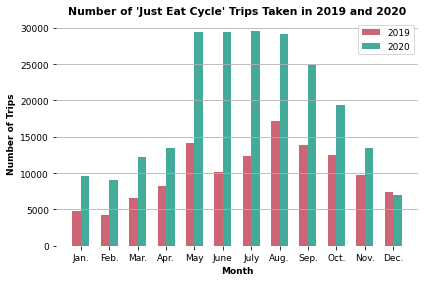

In [5]:
# https://personal.sron.nl/~pault/ - For our colourblind frienldy colours.
# number of trips 
x = np.arange(12)
width = 0.3
months = range(1, 13)
month_abbreviations = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']
figure1, ax1 = plt.subplots(1, 1, figsize=(6,4))
ax1.bar(x - width/2, [len(trips_2019[trips_2019.started_at.dt.month == x]) for x in months],
       width=width, label='2019', color = '#cc6677')
ax1.bar(x + width/2, [len(trips_2020[trips_2020.started_at.dt.month == x]) for x in months],
       width=width, label='2020', color = '#44aa99')
ax1.set_xticks(x)
ax1.set_xticklabels(month_abbreviations)
ax1.set_title("Number of 'Just Eat Cycle' Trips Taken in 2019 and 2020",fontweight='bold')
ax1.set_ylabel("Number of Trips",fontweight='bold')
ax1.set_xlabel("Month",fontweight='bold')
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.grid(axis='y')
ax1.spines["bottom"].set_visible(False)
figure1.tight_layout()
ax1.legend()
plt.savefig('number_trips.pdf')
plt.show()


# On the 11th of may people are allowed to go outside to exercise and we see an almost double increase in bike usage
# Lifted restrictions happened mid July, but people were just as active before that. 
# Since number of trips are already higher than the previous year at start of 2020, we may need to take into account
# that the bikes may naturally have been getting more popular. 
# last year there was a dip in summer months when people normally go abroad for vacation. With lockdown, it stays 
# completely flat, indicating that everyone is still there in Edinburgh

In [6]:
trips_2019

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2019-01-01 05:58:47.853000+00:00,2019-01-01 07:16:14.003000+00:00,4646,259,St Andrew Square,North East corner,55.954749,-3.192774,285,Ocean Terminal,Debenhams / Puregym entrance,55.981286,-3.176351
1,2019-01-01 06:02:13.573000+00:00,2019-01-01 07:21:17.799000+00:00,4744,259,St Andrew Square,North East corner,55.954749,-3.192774,285,Ocean Terminal,Debenhams / Puregym entrance,55.981286,-3.176351
2,2019-01-01 06:14:09.702000+00:00,2019-01-01 07:21:57.806000+00:00,4068,251,Waverley Station,Platform level near Calton Road Exit,55.952641,-3.187527,285,Ocean Terminal,Debenhams / Puregym entrance,55.981286,-3.176351
3,2019-01-01 06:25:08.003000+00:00,2019-01-01 06:36:22.831000+00:00,674,358,Leith Walk,Leith Walk opposite Dalmeny Street,55.965040,-3.176686,284,Leith Links,Corner of Vanburgh Place and Lochend Road,55.969199,-3.166885
4,2019-01-01 06:54:31.775000+00:00,2019-01-01 06:59:52.605000+00:00,320,251,Waverley Station,Platform level near Calton Road Exit,55.952641,-3.187527,261,Brunswick Place,Junction Brunswick Street and Elm Row,55.960930,-3.181005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121105,2019-12-30 22:46:51.119000+00:00,2019-12-30 23:07:29.113000+00:00,1237,1098,Marchmont Crescent,Corner of Marchmont Road,55.936432,-3.194150,251,Waverley Station,Platform level near Calton Road Exit,55.952641,-3.187527
121106,2019-12-30 22:58:21.713000+00:00,2019-12-30 23:14:11.583000+00:00,949,285,Ocean Terminal,Debenhams / Puregym entrance,55.981286,-3.176351,1769,Brunswick Place,Corner of Elm Row/Brunswick Street,55.960852,-3.180986
121107,2019-12-30 23:35:33.033000+00:00,2019-12-30 23:45:05.715000+00:00,572,1025,Dundee Terrace,Corner of Dundee Street & Dundee Terrace,55.939710,-3.220589,1738,Wester Coates Terrace,Junction with Roseburn Terrace,55.945648,-3.231847
121108,2019-12-30 23:41:48.318000+00:00,2019-12-30 23:51:45.413000+00:00,597,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,1025,Dundee Terrace,Corner of Dundee Street & Dundee Terrace,55.939710,-3.220589


In [7]:
# Creating 12 month long pre and post pandemic datasets. Lockdown started on 24th March. 
# pre_covid will contain trips from 25th March 2019 to 24th March 2020
# post_coivd will contain trips from 25th March 2020 to 24th March 2021 *TODO, refresh when it gets to that time*

timeline = {
    'pre_covid_start' : pd.to_datetime('2019-03-25'),
    'pre_covid_end'   : pd.to_datetime('2020-03-24'),
    'post_covid_start': pd.to_datetime('2020-03-25'),
    'post_covid_end'  : pd.to_datetime('2021-03-24')
}

pre_covid_time = ((all_trips.started_at.dt.date >= timeline['pre_covid_start']) 
                 & (all_trips.started_at.dt.date <= timeline['pre_covid_end']))
post_covid_time = ((all_trips.started_at.dt.date >= timeline['post_covid_start'])
                  & (all_trips.started_at.dt.date <= timeline['post_covid_end']))

pre_covid = all_trips[pre_covid_time]
post_covid = all_trips[post_covid_time]
display(pre_covid)
display(post_covid)

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
13780,2019-03-25 00:06:58.458000+00:00,2019-03-25 00:14:02.640000+00:00,424,189,City Chambers,City Chambers Quadrangle,55.950109,-3.190258,273,Shrubhill,Sainsbury's Leith Walk,55.962537,-3.179473
13781,2019-03-25 00:23:16.613000+00:00,2019-03-25 00:26:47.456000+00:00,210,340,Meadow Place,Corner of Meadow Place and Melville Drive,55.940300,-3.194592,265,Meadows East,Melville Terrace,55.939809,-3.182739
13782,2019-03-25 00:27:38.301000+00:00,2019-03-25 00:43:58.778000+00:00,980,251,Waverley Station,Platform level near Calton Road Exit,55.952641,-3.187527,347,Simon Square,Corner of Simon Square & Gilmour Street,55.944868,-3.182671
13783,2019-03-25 00:30:43.350000+00:00,2019-03-25 00:35:32.182000+00:00,288,259,St Andrew Square,North East corner,55.954906,-3.192444,262,Canonmills,near Tesco's,55.962804,-3.196284
13784,2019-03-25 00:47:04.502000+00:00,2019-03-25 00:52:49.006000+00:00,344,347,Simon Square,Corner of Simon Square & Gilmour Street,55.944868,-3.182671,264,Pollock Halls,Pollock Halls Entrance,55.939963,-3.171586
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150824,2020-03-24 22:42:05.341000+00:00,2020-03-24 22:53:12.103000+00:00,666,1752,IGMM - Western General,The Institute of Genetics and Molecular Medicine,55.962642,-3.231916,1038,South Trinity Road,Corner of South Trinity Road and Ferry Road,55.971325,-3.207964
150825,2020-03-24 22:42:13.217000+00:00,2020-03-24 22:54:48.825000+00:00,755,1025,Dundee Terrace,Corner of Dundee Street & Dundee Terrace,55.939710,-3.220589,1808,Gorgie Road,Corner with McLeod Street,55.938741,-3.229909
150826,2020-03-24 22:46:47.397000+00:00,2020-03-24 22:49:16.011000+00:00,148,1025,Dundee Terrace,Corner of Dundee Street & Dundee Terrace,55.939710,-3.220589,1025,Dundee Terrace,Corner of Dundee Street & Dundee Terrace,55.939710,-3.220589
150827,2020-03-24 22:49:39.602000+00:00,2020-03-24 23:04:03.918000+00:00,864,1025,Dundee Terrace,Corner of Dundee Street & Dundee Terrace,55.939710,-3.220589,1808,Gorgie Road,Corner with McLeod Street,55.938741,-3.229909


,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
150829,2020-03-25 00:22:07.105000+00:00,2020-03-25 06:37:18.020000+00:00,22510,1091,Holyrood Road,Opposite St Leonards Land,55.949560,-3.180413,1091,Holyrood Road,Opposite St Leonards Land,55.949560,-3.180413
150830,2020-03-25 00:24:59.641000+00:00,2020-03-25 01:26:49.663000+00:00,3710,1091,Holyrood Road,Opposite St Leonards Land,55.949560,-3.180413,1028,Hunter Square,In Hunter Square next to Tron Kirk,55.949798,-3.187795
150831,2020-03-25 00:27:29.779000+00:00,2020-03-25 00:52:09.507000+00:00,1479,1763,Comely Bank Road,Outside Raeburn Place Sports Ground,55.959410,-3.215661,1090,Hillside Crescent,East end of Hillside Crescent,55.957872,-3.175888
150832,2020-03-25 06:47:29.620000+00:00,2020-03-25 07:47:51.323000+00:00,3621,1824,Duke Street,Junction with Easter Road,55.969012,-3.167395,1824,Duke Street,Junction with Easter Road,55.969012,-3.167395
150833,2020-03-25 07:06:00.239000+00:00,2020-03-25 07:35:33.850000+00:00,1773,1769,Brunswick Place,Corner of Elm Row/Brunswick Street,55.960852,-3.180986,1769,Brunswick Place,Corner of Elm Row/Brunswick Street,55.960852,-3.180986
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362444,2021-03-13 22:50:42.035000+00:00,2021-03-13 22:59:20.160000+00:00,518,1052,Surgeons Hall,East side of Nicolson Street,55.946643,-3.185475,264,Pollock Halls,Pollock Halls Entrance,55.940081,-3.171747
362445,2021-03-13 23:05:44.953000+00:00,2021-03-13 23:38:36.451000+00:00,1971,2263,Musselburgh Lidl,Musselborough North High Street opposite Harbo...,55.943880,-3.066754,2263,Musselburgh Lidl,Musselborough North High Street opposite Harbo...,55.943880,-3.066754
362446,2021-03-13 23:05:49.011000+00:00,2021-03-13 23:37:57.584000+00:00,1928,2263,Musselburgh Lidl,Musselborough North High Street opposite Harbo...,55.943880,-3.066754,2263,Musselburgh Lidl,Musselborough North High Street opposite Harbo...,55.943880,-3.066754
362447,2021-03-13 23:06:52.776000+00:00,2021-03-13 23:38:12.447000+00:00,1879,2263,Musselburgh Lidl,Musselborough North High Street opposite Harbo...,55.943880,-3.066754,2263,Musselburgh Lidl,Musselborough North High Street opposite Harbo...,55.943880,-3.066754


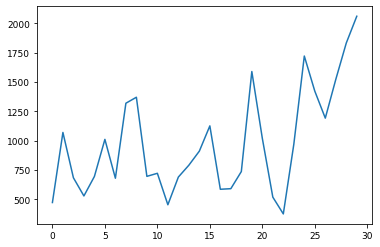

In [8]:
# does number of trips in May correspond to announcement?
may_covid = trips_2020[trips_2020.started_at.dt.month == 5]
trips_per_day = [len(may_covid[may_covid.started_at.dt.day == x]) for x in range(1, 31)]
plt.plot(trips_per_day)
# not really lol
# bike usage tends to go down on weekends, would imply people mainly use them for commute and not pleasure

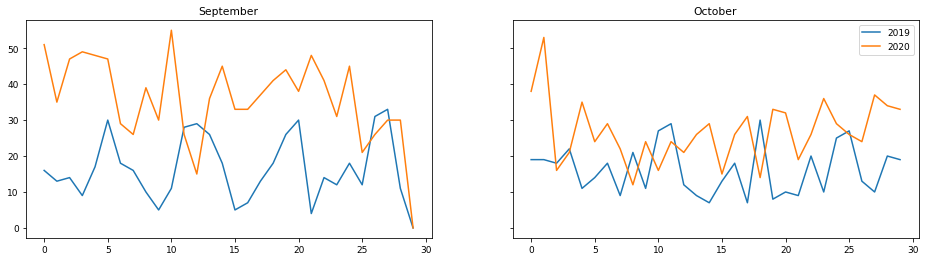

In [9]:
# what about number of post 10 pm rides before and after curfew? 
def late_night_trips(month):
    late_2019 = trips_2019[(trips_2019.started_at.dt.month == month) & (trips_2019.started_at.dt.hour >= 22)]
    late_2020 = trips_2020[(trips_2020.started_at.dt.month == month) & (trips_2020.started_at.dt.hour >= 22)]
    late_per_day_2019 = [len(late_2019[late_2019.started_at.dt.day == x]) for x in range(1, 31)]
    late_per_day_2020 = [len(late_2020[late_2020.started_at.dt.day == x]) for x in range(1, 31)] 
    return late_per_day_2019, late_per_day_2020

late_sep_2019, late_sep_2020 = late_night_trips(9)
late_oct_2019, late_oct_2020 = late_night_trips(10)
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(16,4))
axs[0].plot(late_sep_2019, label='2019')
axs[0].plot(late_sep_2020, label='2020')
axs[0].set_title('September')
axs[1].plot(late_oct_2019, label='2019')
axs[1].plot(late_oct_2020, label='2020')
axs[1].set_title('October')
plt.legend()
# curfew happens on 22'nd of septermber so kinda yeah
# it drops down to same amount as previous year (unusual) and stays there for coulple weeks before seperating again

In [10]:
# what were the most popular locations pre and post covid? 
print('2019:')
print(trips_2019['start_station_name'].value_counts())
print('\n2020:')
print(print(trips_2020['start_station_name'].value_counts()))
# Honestly don't know places in Edinburgh well enough to spot anything interesting here
# But if Portobello is a beach, I think that says a lot
# the places are definetely a lot more picturesque
# for final project we need to map lat and long to indicate how many start locations were done where

2019:
Bristo Square                                          6393
St Andrew Square                                       5283
Meadows East                                           5039
Castle Street                                          3823
Portobello                                             3421
                                                       ... 
Depot Virtual                                             3
Fort Kinnaird                                             3
Pleasance - Edinburgh University Sports Fair              2
Royal Highland Show - West Gate (19th to 23rd June)       1
Cycling Scotland Conference                               1
Name: start_station_name, Length: 138, dtype: int64

2020:
Portobello - Kings Road                                    8224
Meadows East                                               7955
Meadow Place                                               6608
Duke Street                                                5864
Victoria Quay      

In [11]:
# compare bike rides from certain location 
location = 'Pollock Halls'
print('full 2019:', trips_2019['start_station_name'].value_counts()[location])
print('full 2020:', trips_2020['start_station_name'].value_counts()[location])
# what about first semester vs second semester? 
sem1_2020 = trips_2020[trips_2020.started_at.dt.month < 5] # Semester 2 First Year
sem2_2020 = trips_2020[trips_2020.started_at.dt.month > 8] 
print('sem 1 2020:', sem1_2020['start_station_name'].value_counts()[location])
print('sem 2 2020:', sem2_2020['start_station_name'].value_counts()[location])

full 2019: 2820
full 2020: 3363
sem 1 2020: 965
sem 2 2020: 1298


0.20353999999999997
2.3263478740408408
(0.19873223013992297, 0.20834776986007697)


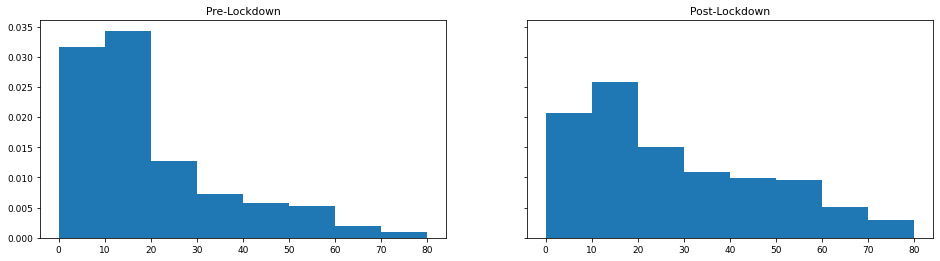

In [12]:
# What is the percentage breakdown of duration of trips each year? 
trips_duration_pre = pre_covid['duration'] / 60 # now in minutes 
trips_duration_post = post_covid['duration'] / 60
# We will conduct an A/B test to see whether customers of 'Just Eat Cycles really did opt to take longer trips'
bins = range(0, 90, 10)
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(16,4))
axs[0].hist(trips_duration_pre, density=True, bins=bins)
axs[0].set_title('Pre-Lockdown')
axs[1].hist(trips_duration_post, density=True, bins=bins)
axs[1].set_title('Post-Lockdown')
# We see that the spread of trips is different in 2020 compared to the previous year.
# We are taking a prop
#print(trips_duration_pre[trips_duration_pre>30].count())
#print(trips_duration_post[trips_duration_post>30].count())
n = 100000
sample_pre = trips_duration_pre.sample(n)
sample_post = trips_duration_post.sample(n)
proprotion_pre = sample_pre[sample_pre>30].count()/sample_pre.count()
proprotion_post = sample_post[sample_post>30].count()/sample_post.count()
#print(proprotion_pre)
#print(proprotion_post)
#print(trips_duration_post.count())
#print(trips_duration_pre.count())
difference = proprotion_post - proprotion_pre
print(difference)
standard_error_pre = np.sqrt(proprotion_pre*(1-proprotion_pre)/n)
standard_error_post = np.sqrt(proprotion_post*(1-proprotion_post)/n)
standard_deviation_difference = np.sqrt(standard_error_pre**2 + standard_error_post**2)
z_score = difference/standard_deviation_difference
from scipy import stats
alpha = 0.01
z_critical_score = stats.norm.ppf(1 - alpha)
print(z_critical_score)
confidence_interval = (difference-(z_critical_score)*standard_deviation_difference,difference+(z_critical_score)*standard_deviation_difference)
print(confidence_interval)

Probability of long trip - pre covid: 0.23704660376945472 post covid: 0.43857858425479634
probability diifference of long trip (pre - post): -0.20153198048534163


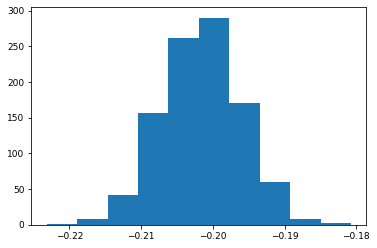

In [13]:
# so we can basically create an experiment to see for each time period: do they go for a 'long trip'?
# both periods contains at least 130K 'runs of the experiment' so we can assume our observed results 
# reflect the limiting relative frequency. 
durations_pre = pre_covid['duration'] / 60
durations_post = post_covid['duration'] / 60

long_trip = 30 # minutes

results_pre = (durations_pre > long_trip).to_numpy()
results_post = (durations_post > long_trip).to_numpy()

# probabilities of there being a long trip in each time period
p_long_pre = sum(results_pre) / len(results_pre)
p_long_post = sum(results_post) / len(results_post)
print(f'Probability of long trip - pre covid: {p_long_pre} post covid: {p_long_post}')
actual_diff = p_long_pre - p_long_post
print(f'probability diifference of long trip (pre - post): {actual_diff}')

# now that we have our objective probabilites of a long trip in each time period and a long trip is a
# binomial variable (it can either be a long trip or not, so probability of not a long trip is (1-p)),
# we can use that to work out the probability for the number of long trips in a certain amount of trips
# using a binomial distribution -- by finding the number of combinations for those trips time its 
# probability using our relative frequencies. We can then sample a number of long trips according to each 
# distribution and compare the difference. If we do this over and over we will then be left with a distribution 
# of how many times there were more long trips in pre compared to post and by how much. 

# using bootstrapping
runs = 1000 # how many times to sample from each distribution
n = 13424  # how many trips we consider in our binomial distributions 
           # here I'm using average number of trips per month
differences = []
for i in range(runs):
    n_long_pre = np.random.binomial(n=n, p=p_long_pre)
    n_long_post = np.random.binomial(n=n, p=p_long_post)
    differences.append((n_long_pre - n_long_post) / n)

plt.hist(differences) # so it looks like we can say with 100% confidence that more long trips would be taken
plt.show()            # in a month in the post pandemic period. With a relative difference between ~ (-0.220, -0.180)



In [14]:
trips_per_month = []
for trips in [trips_2019, trips_2020, trips_2021]:
    for m in range(1, 13):
        if id(trips) == id(trips_2021) and m == 4: break
        trips_per_month.append(sum(trips.started_at.dt.month == m))
        
average_trips_month = sum(trips_per_month) / len(trips_per_month)
average_trips_month

13424.037037037036

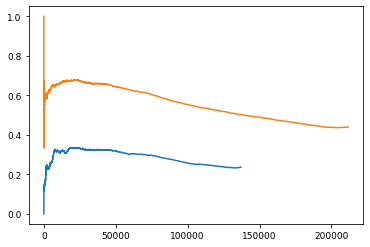

In [15]:
# we can calculate and look at our relative frequencies as n tends to infinity
relative_frequencies_pre = []
successes = 0
for i in range(len(results_pre)):
    successes += results_pre[i]
    relative_frequencies_pre.append(successes / (i+1))

relative_frequencies_post = []
successes = 0
for i in range(len(results_post)):
    successes += results_post[i]
    relative_frequencies_post.append(successes / (i+1))

plt.plot(relative_frequencies_pre)
plt.plot(relative_frequencies_post)

In [16]:
# ------ PROCESSING ------
# Need to determine if a station got replaced in December and if it did what to. 
# For fair comparison we can combine all station locations in 2019 set that don't
# exist in the 2020 set to the closest location that does. (In most cases this will
# be the exact same location that has just been updated, but even if its not it 
# still makes sense to do this for fair comparison). 

pre_covid = pre_covid[pre_covid.end_station_latitude > 55] # first removing the 3 trips that end in Liverpool

def get_unique_coordinates(trips):
    starts = set(zip(trips.start_station_latitude, trips.start_station_longitude))
    ends = set(zip(trips.end_station_latitude, trips.end_station_longitude))
    unique = starts | ends
    return list(unique)
    
coordinates_2019 = get_unique_coordinates(pre_covid)
coordinates_2020 = get_unique_coordinates(post_covid)

columns = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
pre_covid_replaced = pre_covid[columns]

def find_closest_coordinate(coordinate, valid_coordinates):
    
    def distance(x, y):
        return (x[0] - y[0])**2 + (x[1] - y[1])**2
    
    min_distance = float('inf')
    min_coordinate = None
    for valid_coordinate in valid_coordinates:
        dist = distance(coordinate, valid_coordinate)
        if dist < min_distance:
            min_distance = dist
            min_coordinate = valid_coordinate
    return min_coordinate

for coordinate in coordinates_2019:
    if coordinate not in coordinates_2020:
        closest = find_closest_coordinate(coordinate, coordinates_2020)
        old_start = {'start_station_latitude': coordinate[0], 'start_station_longitude': coordinate[1]}
        new_start = {'start_station_latitude': closest[0], 'start_station_longitude': closest[1]}
        old_end = {'end_station_latitude': coordinate[0], 'end_station_longitude': coordinate[1]}
        new_end = {'end_station_latitude': closest[0], 'end_station_longitude': closest[1]}
        pre_covid_replaced = pre_covid_replaced.replace(old_start, new_start)
        pre_covid_replaced = pre_covid_replaced.replace(old_end, new_end)

pre_covid_replaced

,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
13780,55.950109,-3.190258,55.960852,-3.180986
13781,55.940238,-3.194640,55.939809,-3.182739
13782,55.952641,-3.187527,55.944859,-3.182590
13783,55.954906,-3.192444,55.962804,-3.196284
13784,55.944859,-3.182590,55.940081,-3.171747
...,...,...,...,...
150824,55.962642,-3.231916,55.971325,-3.207964
150825,55.939710,-3.220589,55.938741,-3.229909
150826,55.939710,-3.220589,55.939710,-3.220589
150827,55.939710,-3.220589,55.938741,-3.229909


In [21]:
starts_pre

,latitude,longitude,counts
0,55.945834,-3.189053,6336
1,55.939809,-3.182739,5520
2,55.954906,-3.192444,5449
3,55.951501,-3.203184,3908
4,55.957915,-3.118332,3724
...,...,...,...
104,55.972335,-3.155782,3
105,55.983766,-3.401352,3
106,55.992957,-3.407156,2
107,55.981107,-3.394211,1


In [22]:
ends_pre

,latitude,longitude,counts
0,55.939809,-3.182739,5148
1,55.957915,-3.118332,5046
2,55.964058,-3.195700,4837
3,55.962804,-3.196284,4617
4,55.977617,-3.174126,4530
...,...,...,...
102,55.990530,-3.385597,7
103,55.986761,-3.382427,6
104,55.972335,-3.155782,5
105,55.992957,-3.407156,4


In [31]:
test = pd.merge(starts_pre, ends_pre, how='outer', on=['latitude', 'longitude'])
test.columns = ['latitude', 'longitude', 'counts_pre', 'counts_post']
test = test.fillna(0)
test['counts'] = test.apply(lambda x : x.counts_pre + x.counts_post, axis=1)
test

,latitude,longitude,counts_pre,counts_post,counts
0,55.945834,-3.189053,6336,3881.0,10217.0
1,55.939809,-3.182739,5520,5148.0,10668.0
2,55.954906,-3.192444,5449,3238.0,8687.0
3,55.951501,-3.203184,3908,2724.0,6632.0
4,55.957915,-3.118332,3724,5046.0,8770.0
...,...,...,...,...,...
104,55.972335,-3.155782,3,5.0,8.0
105,55.983766,-3.401352,3,3.0,6.0
106,55.992957,-3.407156,2,4.0,6.0
107,55.981107,-3.394211,1,0.0,1.0


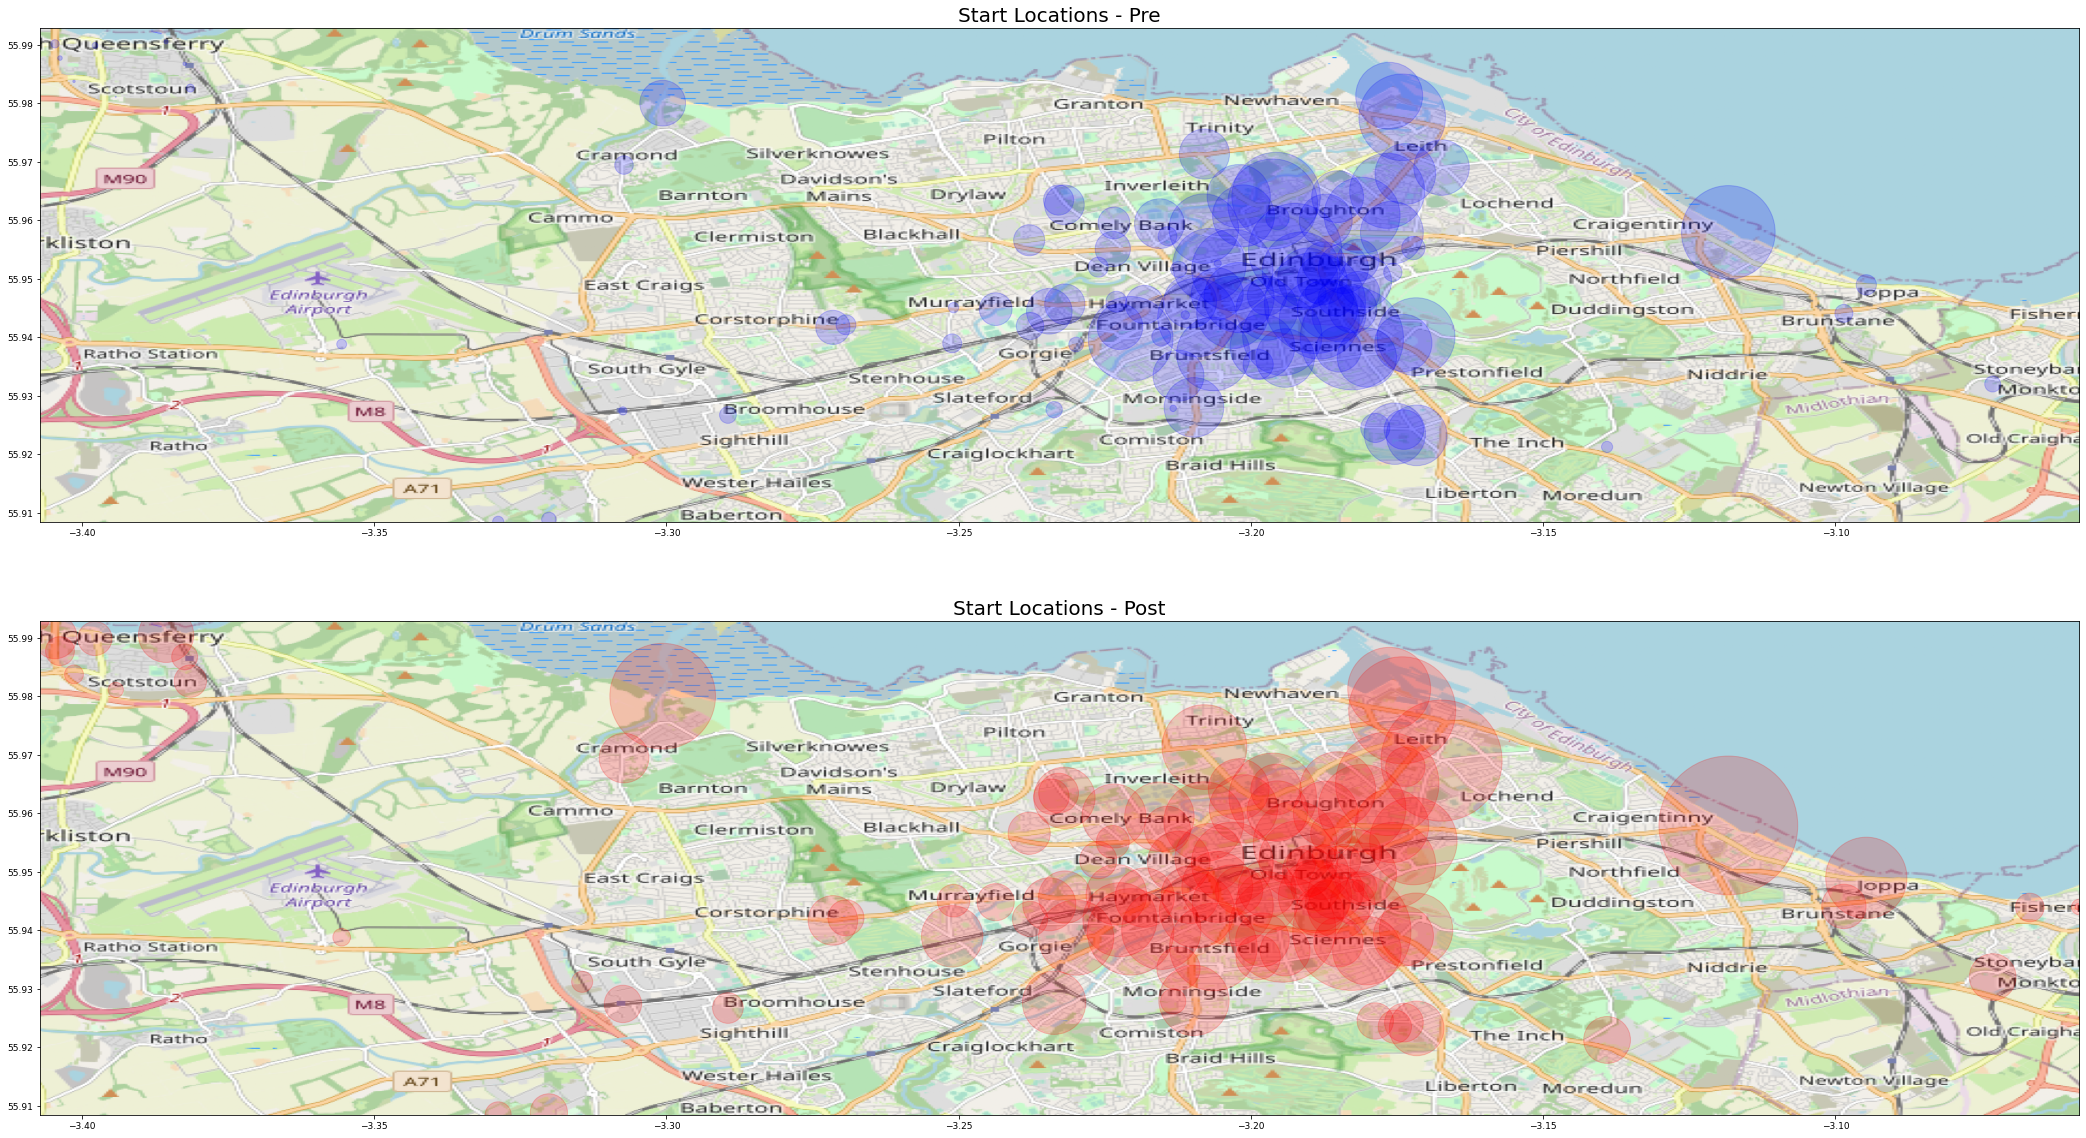

In [33]:
# Heat map -- want to create a map of Edinburgh where we plot all bike locations with a dot representative of how
# many trips were made there each year

def get_location_info(trips, pos):
    locs = trips[[f'{pos}_station_latitude', f'{pos}_station_longitude']]
    locs = locs.value_counts().to_frame().reset_index()
    locs.columns = ['latitude', 'longitude', 'counts']
    return locs

starts_pre = get_location_info(pre_covid_replaced, 'start')
ends_pre   = get_location_info(pre_covid_replaced, 'end')
starts_post = get_location_info(post_covid, 'start')
ends_post   = get_location_info(post_covid, 'end')

# recievie min and max lat and long for determining size of map we need
map_size = {'min_long': float('inf'), 'max_long': float('-inf'), 'min_lat': float('inf'), 'max_lat': float('-inf')}

for df in [starts_pre, ends_pre, starts_post, ends_post]:
    if df.latitude.min() < map_size['min_lat']:
        map_size['min_lat'] = df.latitude.min()
    if df.longitude.min() < map_size['min_long']:
        map_size['min_long'] = df.longitude.min()
    if df.latitude.max() > map_size['max_lat']:
        map_size['max_lat'] = df.latitude.max()
    if df.longitude.max() > map_size['max_long']:
        map_size['max_long'] = df.longitude.max()
        
# at this point I entered the min/max lat/long coordinates into opestreetmap.org and downloaded map as 'map.png'

edinburgh_map = plt.imread('map.png') # with boundaries according to map_size

# --- adjusting to combine starts and ends instead 
pre_activity = pd.merge(starts_pre, ends_pre, how='outer', on=['latitude', 'longitude'])
pre_activity.columns = ['latitude', 'longitude', 'counts_pre', 'counts_post']
pre_activity = pre_activity.fillna(0)
pre_activity['counts'] = pre_activity.apply(lambda x : x.counts_pre + x.counts_post, axis=1)

post_activity = pd.merge(starts_post, ends_post, how='outer', on=['latitude', 'longitude'])
post_activity.columns = ['latitude', 'longitude', 'counts_pre', 'counts_post']
post_activity = post_activity.fillna(0)
post_activity['counts'] = post_activity.apply(lambda x : x.counts_pre + x.counts_post, axis=1)

fig, axs = plt.subplots(2, 1, figsize=(60, 20))
alpha = 0.2
title_size = 20

for i in range(2):
    axs[i].set_xlim(map_size['min_long'], map_size['max_long'])
    axs[i].set_ylim(map_size['min_lat'], map_size['max_lat'])
    axs[i].imshow(edinburgh_map, zorder=0, extent=map_size.values(), aspect='equal')

axs[0].scatter(pre_activity.longitude, pre_activity.latitude, s=pre_activity.counts, alpha=alpha, c='b')
axs[0].set_title('Start Locations - Pre', fontsize=title_size)

axs[1].scatter(post_activity.longitude, post_activity.latitude, s=post_activity.counts, alpha=alpha, c='r')
axs[1].set_title('Start Locations - Post', fontsize=title_size)


""" old code for seperate starts and ends
fig, axs = plt.subplots(4, 1, figsize=(60, 20))
alpha = 0.2
title_size = 20

for i in range(4):
    axs[i].set_xlim(map_size['min_long'], map_size['max_long'])
    axs[i].set_ylim(map_size['min_lat'], map_size['max_lat'])
    axs[i].imshow(edinburgh_map, zorder=0, extent=map_size.values(), aspect='equal')

axs[0].scatter(starts_pre.longitude, starts_pre.latitude, s=starts_pre.counts, alpha=alpha, c='b')
axs[0].set_title('Start Locations - Pre', fontsize=title_size)

axs[1].scatter(starts_post.longitude, starts_post.latitude, s=starts_post.counts, alpha=alpha, c='r')
axs[1].set_title('Start Locations - Post', fontsize=title_size)

axs[2].scatter(ends_pre.longitude, ends_pre.latitude, s=ends_pre.counts, alpha=alpha, c='b')
axs[2].set_title('End Locations - Pre', fontsize=title_size)

axs[3].scatter(ends_post.longitude, ends_post.latitude, s=ends_post.counts, alpha=alpha, c='r')
axs[3].set_title('End Locations - Post', fontsize=title_size)
"""


plt.show()

# Things we can potentially add:
# * Percentage increase in some of popular rural areas -- are these percentage increases greater than the 
#   percentage increases for locations in the city. 
# * Check whether the locations in top left existed in pre (I'm guessing they didn't rather than no one using them.)
#   - we could do all our comparisons based on only locations that were shared across both years. 
# * Experiment with both on same map

In [34]:
starts = pd.merge(starts_pre, starts_post, on=['latitude', 'longitude'])
ends = pd.merge(ends_pre, ends_post, on=['latitude', 'longitude'])
starts.columns = ['latitude', 'longitude', 'counts_pre', 'counts_post']
ends.columns = ['latitude', 'longitude', 'counts_pre', 'counts_post']

# getting activity counts 
trip_activity = pd.merge(starts, ends, on=['latitude', 'longitude'])
trip_activity.columns = ['latitude', 'longitude', 'counts_pre_s', 'counts_post_s', 'counts_pre_e', 'counts_post_e']
trip_activity['activity_pre'] = trip_activity.apply(lambda row : row.counts_pre_s + row.counts_pre_e, axis=1)
trip_activity['activity_post'] = trip_activity.apply(lambda row : row.counts_post_s + row.counts_post_e, axis=1)
trip_activity = trip_activity.drop(['counts_pre_s', 'counts_post_s', 'counts_pre_e', 'counts_post_e'], axis=1)
trip_activity['activity_change'] = trip_activity.apply(lambda row : row.activity_post - row.activity_pre, axis=1)
trip_activity = trip_activity.sort_values('activity_change', ascending=False)
trip_activity['station_name'] = ""
   
# retrieve station name corresponding to grid coordinates
for i, row in trip_activity.iterrows():
    lat = row['latitude']
    long = row['longitude']
    mask = (post_covid.start_station_latitude == lat) & (post_covid.start_station_longitude == long)
    name = post_covid[mask].iloc[0]['start_station_name']
    trip_activity.at[i, 'station_name'] = name
    
trip_activity

,latitude,longitude,activity_pre,activity_post,activity_change,station_name
47,55.969012,-3.167395,3080.0,14668.0,11588.0,Duke Street
4,55.957915,-3.118332,8770.0,19263.0,10493.0,Portobello - Kings Road
54,55.980031,-3.300642,2095.0,11169.0,9074.0,Cramond Foreshore
73,55.955248,-3.172216,547.0,7649.0,7102.0,Abbeyhill
83,55.951089,-3.175725,337.0,7370.0,7033.0,Dynamic Earth
...,...,...,...,...,...,...
17,55.946766,-3.202038,4929.0,2251.0,-2678.0,Castle Terrace
12,55.943084,-3.188311,6401.0,2450.0,-3951.0,George Square
0,55.945834,-3.189053,10217.0,5337.0,-4880.0,Bristo Square
15,55.951344,-3.191421,6028.0,842.0,-5186.0,Waverley Bridge


In [ ]:
def get_coordinates(station_id=None, name=None):
    if station_id is not None:
        lat = post_covid.loc[post_covid.start_station_id == station_id, 'start_station_latitude'].iloc[0]
        long = post_covid.loc[post_covid.start_station_id == station_id, 'start_station_longitude'].iloc[0]
        return lat, long
    elif name is not None:
        lat = post_covid.loc[post_covid.start_station_name == name, 'start_station_latitude'].iloc[0]
        long = post_covid.loc[post_covid.start_station_name == name, 'start_station_longitude'].iloc[0]
        return lat, long

def display_location_stats(name):
    lat, long = get_coordinates(name=name)
    print(f'{name}, starts:')
    display(starts[(starts.latitude == lat) & (starts.longitude == long)])
    print(f'{name}, ends:')
    display(ends[(ends.latitude == lat) & (ends.longitude == long)])
    
# both of these have changes well above average. Can we do something with that?
# can provide these and more scenic routes as a table in our report -- perhaps also 
# point out in our final maps which ones they correspond to 
display_location_stats('Cramond Foreshore')
display_location_stats('Portobello - Kings Road')